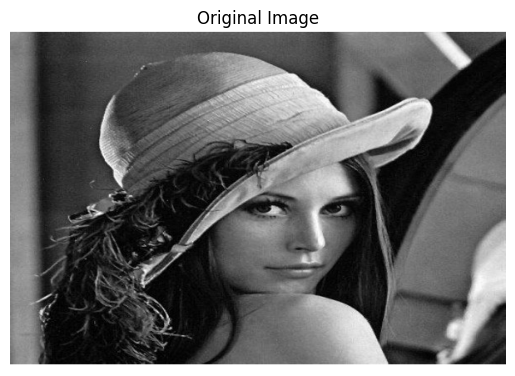

Image Size: 596x402
Total Pixels: 239592


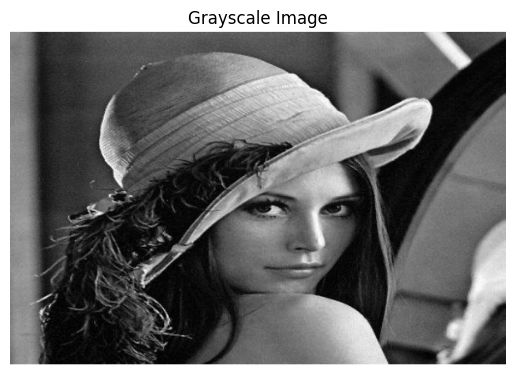

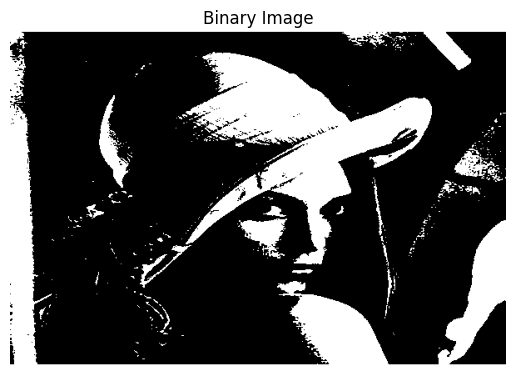

Area of Black Pixels: 182108
Size of Binary Image: (402, 596)


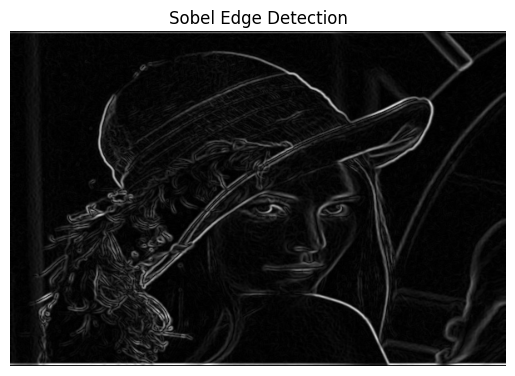

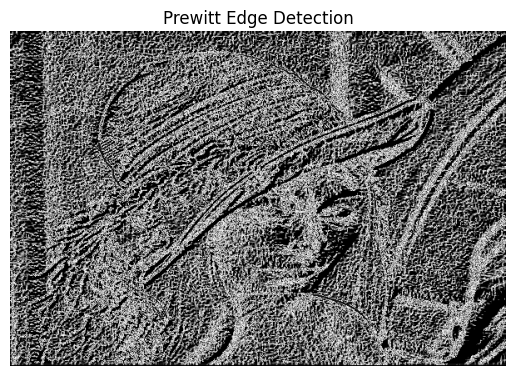

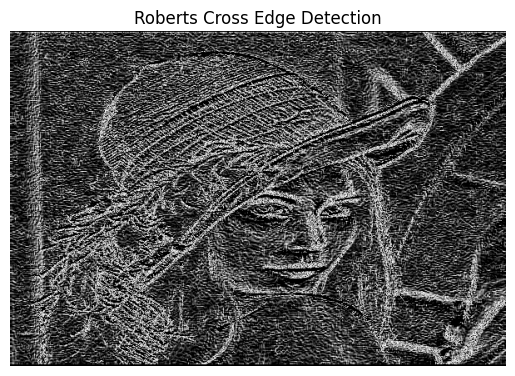

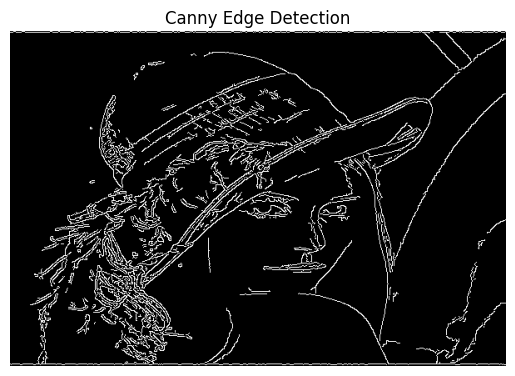

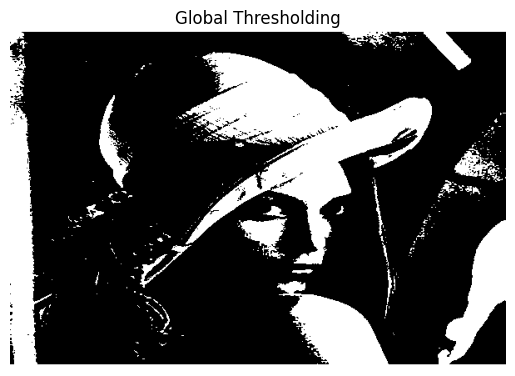

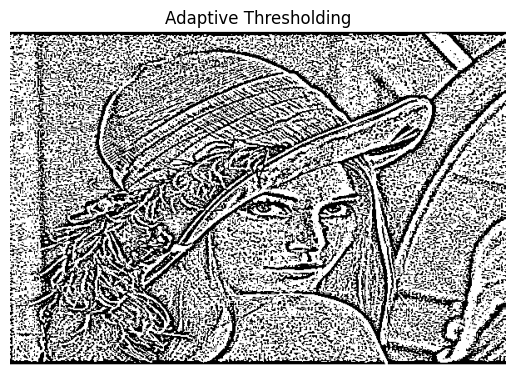

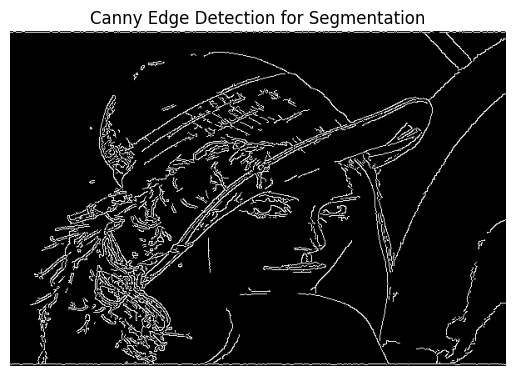

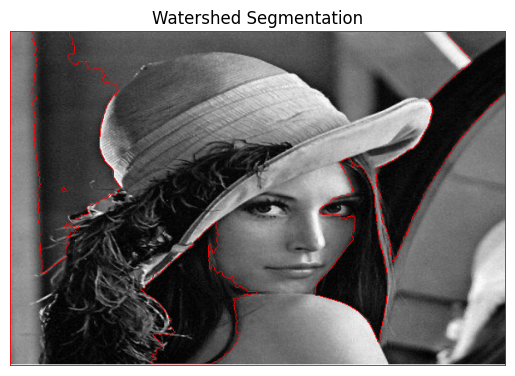

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Image Manipulation

# 1. Read the image
image = cv2.imread('Image1.jpg')

# 2. Display the image
# Convert BGR to RGB for displaying
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

# 3. Extraction of Image size
height, width, channels = image.shape
print(f"Image Size: {width}x{height}")

# 4. Calculation of Image pixels
total_pixels = height * width
print(f"Total Pixels: {total_pixels}")

# 5. Convert RGB to Grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# 6. Convert RGB to Grayscale and Binary image using a threshold
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

# Count the area of black pixels
black_pixels = np.sum(binary_image == 0)
print(f"Area of Black Pixels: {black_pixels}")

# Size of the binary image
print(f"Size of Binary Image: {binary_image.shape}")

# Task 2: Image Properties Manipulation

# 1. Edge Detection

# i. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=5)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()

# ii. Prewitt Operator
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernel_x)
prewitt_y = cv2.filter2D(gray_image, -1, kernel_y)
prewitt = np.sqrt(prewitt_x**2 + prewitt_y**2)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()

# iii. Roberts Cross Operator
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, kernel_x)
roberts_y = cv2.filter2D(gray_image, -1, kernel_y)
roberts = np.sqrt(roberts_x**2 + roberts_y**2)
plt.imshow(roberts, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()

# iv. Canny Edge Detector
edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()

# 2. Image Segmentation

# i. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()

# ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()

# iii. Edge Detection for Segmentation (Canny Edge Detection)
edges_segmentation = cv2.Canny(gray_image, 100, 200)
plt.imshow(edges_segmentation, cmap='gray')
plt.title('Canny Edge Detection for Segmentation')
plt.axis('off')
plt.show()

# iv. Region-Based Segmentation (Watershed Algorithm)
# Convert grayscale image to binary for markers
_, binary_markers = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Noise removal using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary_markers, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
_, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1

# Mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply Watershed Algorithm
markers = cv2.watershed(image_rgb, markers)
image_rgb[markers == -1] = [255, 0, 0]  # Mark boundaries with red

# Display the result
plt.imshow(image_rgb)
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()